In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum-ttf
!fc-list :lang=ko
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
!apt-get install -y fonts-nanum


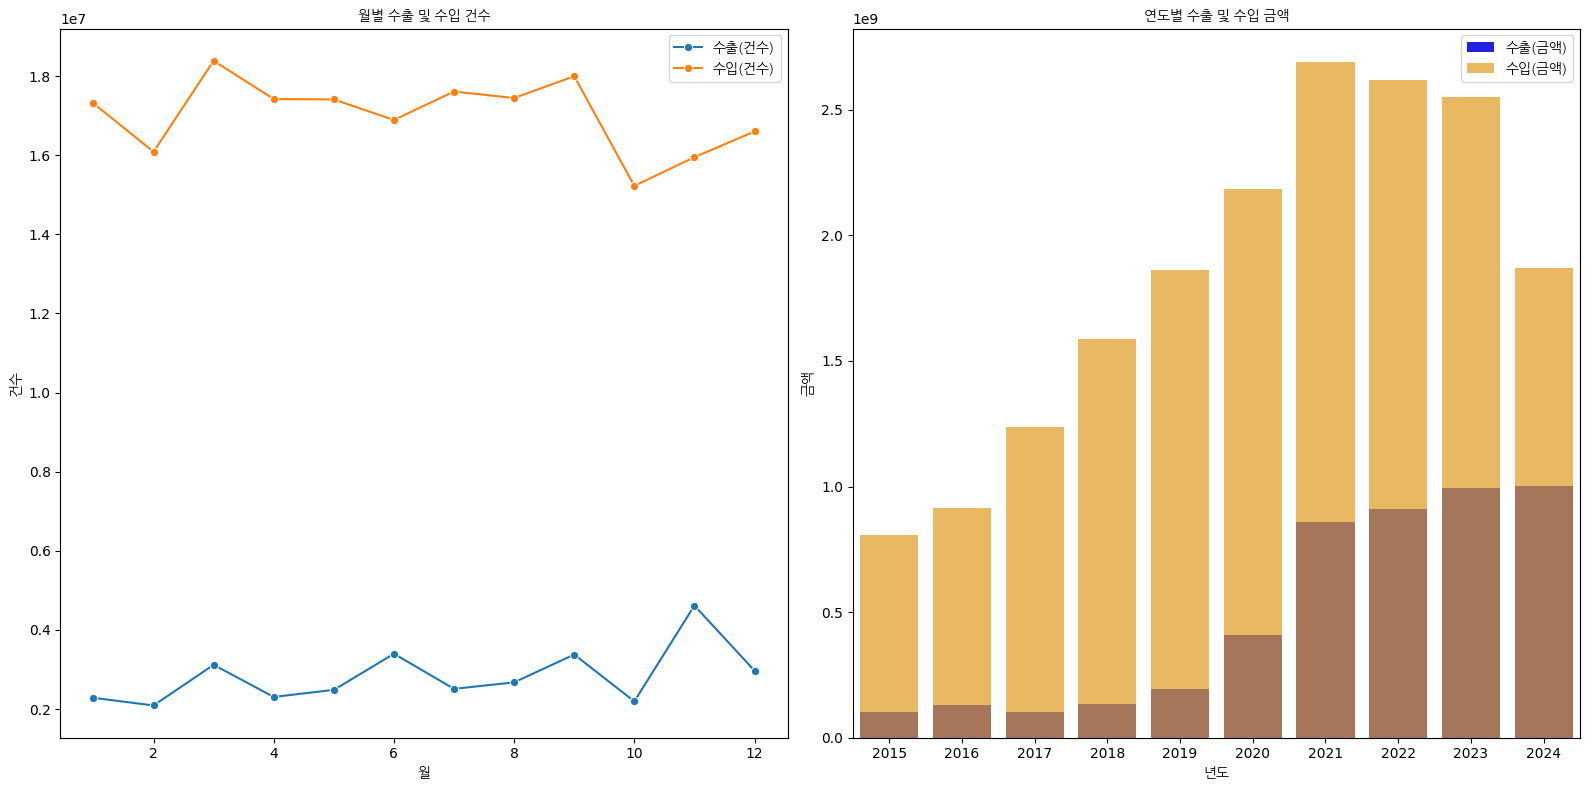

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)


plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False


file_path = '/content/국가물류통합정보센터_전자상거래통계_241109.csv'
data = pd.read_csv(file_path)


data_cleaned = data[data['월'] != '합계'].copy()
numeric_columns = ['수출(건수)', '수출(금액)', '수입(건수)', '수입(금액)']
for col in numeric_columns:
    data_cleaned[col] = data_cleaned[col].str.replace(',', '').astype(int)

data_cleaned['월'] = data_cleaned['월'].astype(int)

monthly_data = data_cleaned.groupby('월')[numeric_columns].sum().reset_index()

yearly_data = data_cleaned.groupby('년도')[numeric_columns].sum().reset_index()

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_data, x='월', y='수출(건수)', label='수출(건수)', marker='o')
sns.lineplot(data=monthly_data, x='월', y='수입(건수)', label='수입(건수)', marker='o')
plt.title('월별 수출 및 수입 건수', fontproperties=fontprop)
plt.xlabel('월', fontproperties=fontprop)
plt.ylabel('건수', fontproperties=fontprop)
plt.legend(prop=fontprop)

plt.subplot(1, 2, 2)
sns.barplot(data=yearly_data, x='년도', y='수출(금액)', color='blue', label='수출(금액)')
sns.barplot(data=yearly_data, x='년도', y='수입(금액)', color='orange', label='수입(금액)', alpha=0.7)
plt.title('연도별 수출 및 수입 금액', fontproperties=fontprop)
plt.xlabel('년도', fontproperties=fontprop)
plt.ylabel('금액', fontproperties=fontprop)
plt.legend(prop=fontprop)

plt.tight_layout()
plt.show()


In [4]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

client_id = 'RDG7pyD_1Wcuxbm5bWDJ'
client_secret = 'ytQsD6H0p0'


def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None


def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return


def main():
    node = 'news'
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)

    print('전체 검색 : %d 건' %total)

    with open('news.json' , 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))
    print ('news.json SAVED')

    json_fname='/content/news.json'
    import pandas as pd
    print(json_fname)
    df = pd.read_json(json_fname)
    df=df['title']
    df.to_csv("news.csv", index=False)


if __name__ == '__main__':
    main()


검색어를 입력하세요: 무역적자
[2024-11-27 16:24:22.830828] Url Request Success
[2024-11-27 16:24:23.263667] Url Request Success
[2024-11-27 16:24:23.718306] Url Request Success
[2024-11-27 16:24:24.174110] Url Request Success
[2024-11-27 16:24:24.643806] Url Request Success
[2024-11-27 16:24:25.140965] Url Request Success
[2024-11-27 16:24:25.625982] Url Request Success
[2024-11-27 16:24:26.109372] Url Request Success
[2024-11-27 16:24:26.601756] Url Request Success
[2024-11-27 16:24:27.103595] Url Request Success
HTTP Error 400: Bad Request
[2024-11-27 16:24:27.401112] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EB%AC%B4%EC%97%AD%EC%A0%81%EC%9E%90&start=1001&display=100
전체 검색 : 142011 건
가져온 데이터 : 1000 건
news.json SAVED
/content/news.json


In [5]:
!pip install konlpy
!pip install networkx==2.7.1
!pip install apyori
!pip install scipy==1.8.0
!pip install pyg-nightly

In [6]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

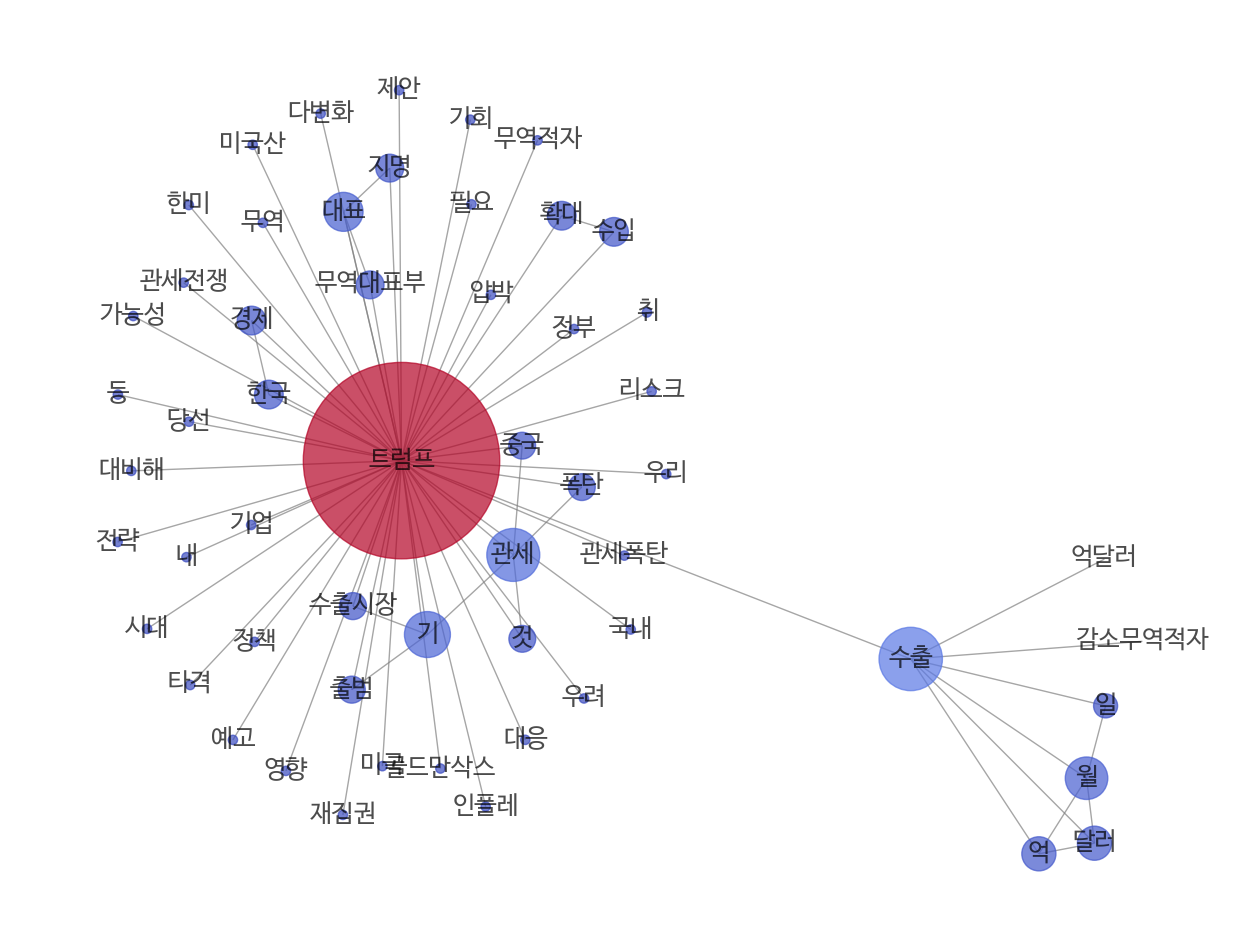

In [2]:

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum

hannanum = Hannanum()


f = open('/content/news.csv', 'r', encoding='utf8')
lines = f.readlines()

f.close()
dataset = []

for i in range(len(lines)):
  dataset.append(hannanum.nouns(re.sub('[^가-힣\s]','', lines[i])))
dataset[:3]


from apyori import apriori

result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)

df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2)&(df['support'] >= 0.01)].sort_values(by='support',
                                                               ascending=False)
df



G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize-min(nsize)) / (max(nsize)-min(nsize))
pos = nx.spring_layout(G)
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=18, pos=pos,\
                 node_color=list(pr.values()), node_size=nsize*10, alpha=0.7,\
                 edge_color='.5', cmap=plt.cm.coolwarm)
plt.savefig('news.png', bbox_inches='tight')